In [1]:
%load_ext autoreload
%autoreload 2

import pyleoclim as pyleo
from pyleoclim import tests
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

## Load test data

In [4]:
soi_data = tests.load_dataset('soi', skiprows=1)
soi_data['Date'] = pd.to_datetime(soi_data['Date'], format='%Y%m')
nt = len(soi_data)
to = np.linspace(1951, 2020-1/12, nt)
Xo = soi_data['Value'].values
ts = pyleo.Series(time=to, value=Xo, time_name='Year', time_unit='AD', value_name='SOI', value_unit='K', label='SOI')
psd_wwz = ts.spectral()
scal_wwz = ts.wavelet()

## Basic styles

`pyleo.set_style()` supports three basic styles:
1. matplotlib - the original matplotlib style
2. journal - the one more journal oriented; suit for articles and papers
3. web - the one more web oriented; suit for webpages, posters, and slides

Also note that we can adjust the `font_scale` to adjust the size of fonts consistently.

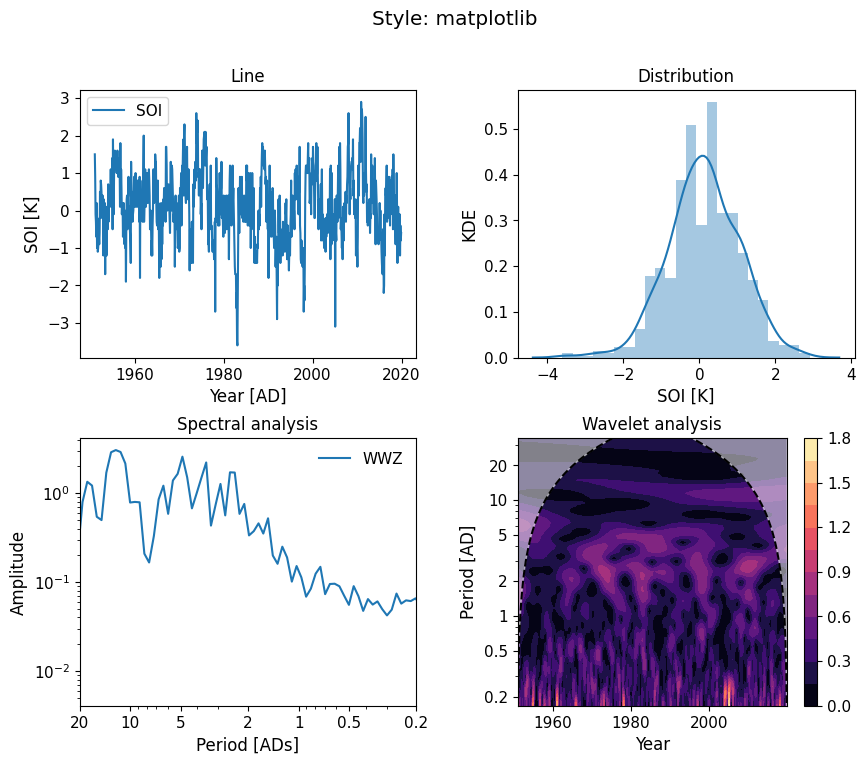

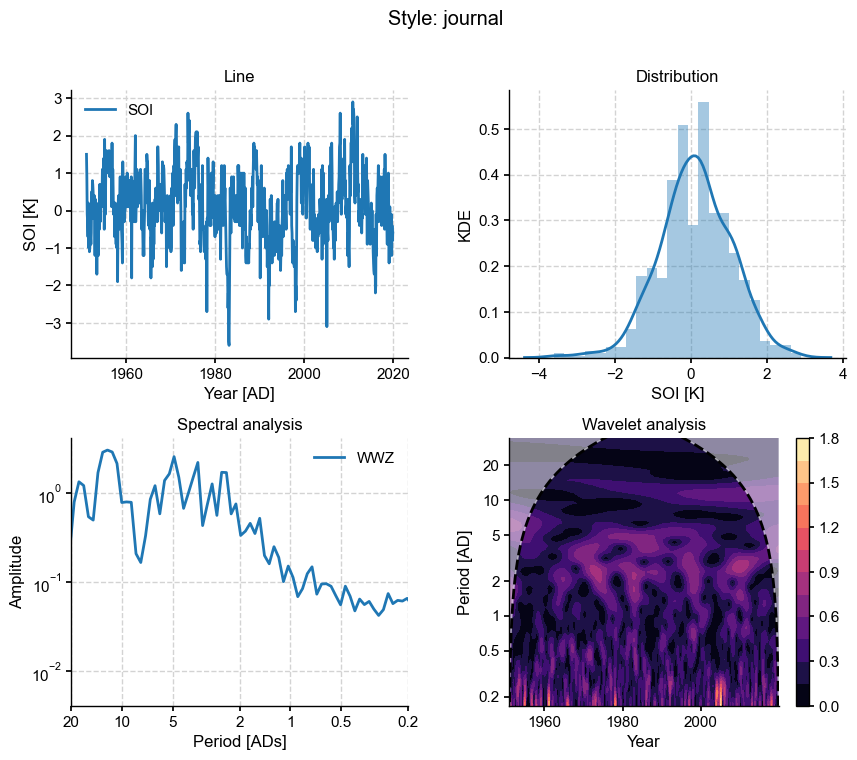

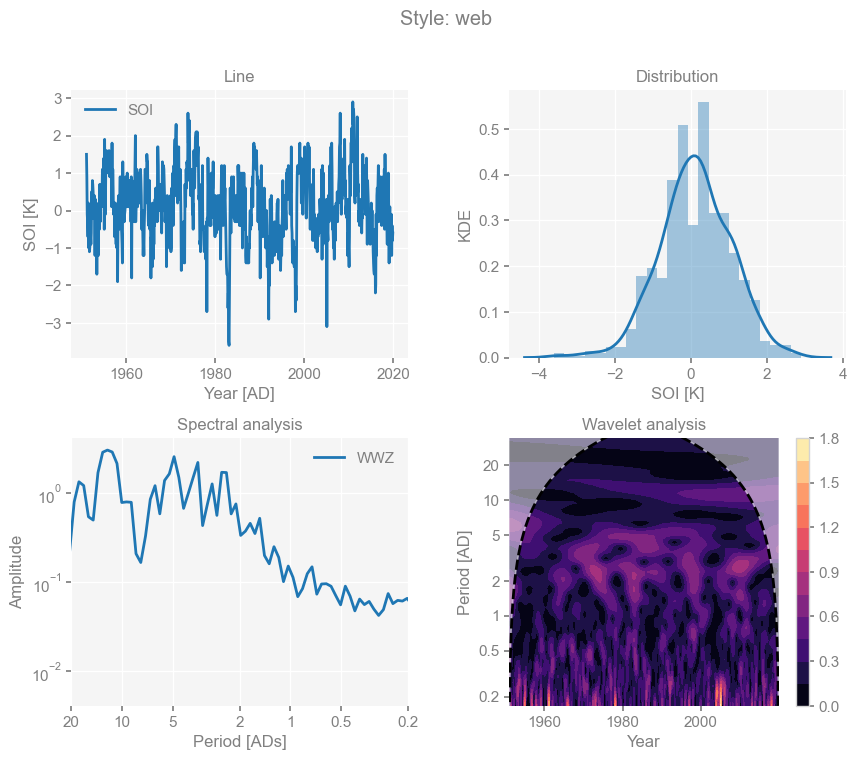

In [5]:
for style in ['matplotlib', 'journal', 'web']:
    pyleo.set_style(style, font_scale=1)
    
    fig = plt.figure(figsize=[10, 8])
    gs = gridspec.GridSpec(2, 2)
    gs.update(wspace=0.3, hspace=0.3) 
    
    ax1 = plt.subplot(gs[0, 0])
    ax1 = ts.plot(title='Line', ax=ax1)
    
    ax2 = plt.subplot(gs[0, 1])
    ax2 = ts.distplot(title='Distribution', ax=ax2)
    
    ax3 = plt.subplot(gs[1, 0])
    ax3 = psd_wwz.plot(title='Spectral analysis', ax=ax3, label='WWZ')
    
    ax4 = plt.subplot(gs[1, 1])
    ax4 = scal_wwz.plot(title='Wavelet analysis', ax=ax4)
    fig.suptitle(f'Style: {style}')
    pyleo.showfig(fig)

We may add suffix to the name of the styles to switch the mode of the styles.
Currently we have the control of whether to turn on the grid and the spines as following:

Figure saved at: "figs/exp001/ts_grid_spines.pdf"


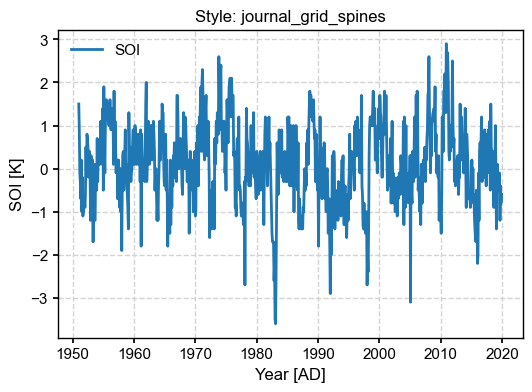

Figure saved at: "figs/exp001/ts_grid_nospines.pdf"


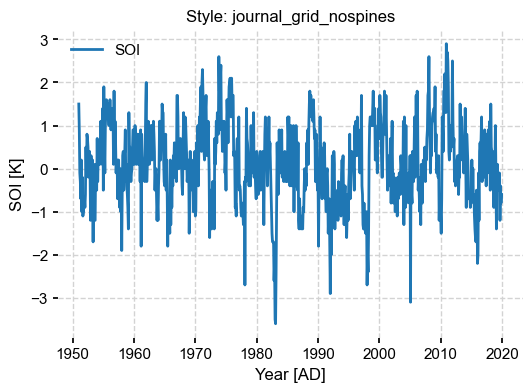

Figure saved at: "figs/exp001/ts_nogrid_spines.pdf"


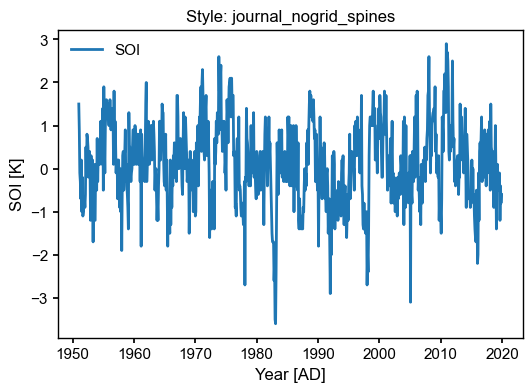

Figure saved at: "figs/exp001/ts_nogrid_nospines.pdf"


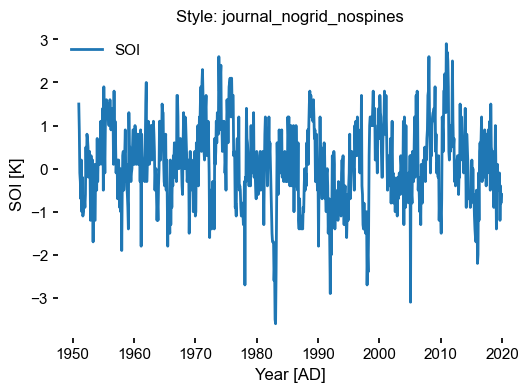

In [6]:
for suffix1 in ['grid', 'nogrid']:
    for suffix2 in ['spines', 'nospines']:
        pyleo.set_style(f'journal_{suffix1}_{suffix2}')
        fig, ax = ts.plot(
            figsize=[6, 4],
            title=f'Style: journal_{suffix1}_{suffix2}',
            savefig_settings={'path': f'./figs/exp001/ts_{suffix1}_{suffix2}.pdf'}
        )
        pyleo.showfig(fig)